In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("exp.csv")
data.head()

,exam1,exam2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exam1   100 non-null    float64
 1   exam2   100 non-null    float64
 2   result  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
data.shape

(100, 3)

# SPLITING THE DATA

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['exam1','exam2']],data.result,test_size=0.1)

In [9]:
x_test

,exam1,exam2
36,33.915500,98.869436
28,61.830206,50.256108
20,67.372028,42.838438
68,80.279574,92.116061
80,88.913896,69.803789
29,38.785804,64.995681
2,35.847409,72.902198
27,93.114389,38.800670
58,74.248691,69.824571
30,61.379289,72.807887


In [10]:
x_train

,exam1,exam2
54,50.286496,49.804539
8,76.098787,87.420570
44,51.047752,45.822701
84,80.366756,90.960148
75,99.827858,72.369252
...,...,...
99,74.775893,89.529813
53,34.524514,60.396342
82,67.319257,66.589353
76,47.264269,88.475865


# MODEL BUILDING

In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [12]:
model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

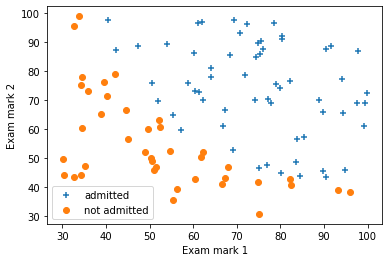

In [13]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
pos,neg=(y==1).reshape(100,1),(y==0).reshape(100,1)
plt.scatter(x[pos[:,0],0],x[pos[:,0],1],marker="+",label='admitted')
plt.scatter(x[neg[:,0],0],x[neg[:,0],1],marker="o",label='not admitted')
plt.xlabel("Exam mark 1")
plt.ylabel("Exam mark 2")
plt.legend()

# SCORES

In [14]:
model.score(x_test,y_test)

0.8

# PREDICTION

In [17]:
m1=int(input("Enter Exam 1 mark:"))
m2=int(input("Enter Exam 2 mark:"))
print("0 means fail 1 means pass -",model.predict([[m1,m2]]))

Enter Exam 1 mark:45
Enter Exam 2 mark:52
0 means fail 1 means pass - [0]
